# 1. Introducao

O objetivo deste projeto e realizar uma analise exploratoria de dados (EDA) para identificar quais fatores influenciam mais a queima de calorias. Alem disso, iremos desenvolver um modelo preditivo para estimar a queima de calorias com base nas variaveis fornecidas.

Etapas:<br>
-Carregamento e Visualizaçao Inicial dos Dados<br>
-Analise Estatistica Descritiva<br>
-Analise de Correlaçao<br>
-Visualização de Dados<br>
-Modelagem Preditiva<br>

O dataset foi disponibilizado no site www.kaggel.com

Informacoes sobre o dataset:<br>
Exercise - O tipo de exercício realizado durante a sessão<br>
Calories Burn - O número estimado de calorias queimadas durante a sessão de exercício.<br>
Dream Weight - O peso desejado do indivíduo.<br>
Actual Weight - O peso medido do indivíduo, incluindo variação natural<br>
Age - A idade do indivíduo que realiza o exercício.<br>
Gender - O gênero do indivíduo (masculino ou feminino)<br>
Duration - A duração de cada sessão de exercício em minutos.<br>
Heart Rate - A frequência cardíaca média durante a sessão de exercício.<br>
BMI - Índice de massa corporal do indivíduo, indicando a composição corporal.<br>
Weather Conditions - <br>
Exercise Intensity - <br>

# 2. Importando Bibliotecas

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 3. Analisando Estrutura do Dataset

In [182]:
df = pd.read_csv('C:/DataSets/exercise_dataset.csv')

In [183]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [184]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset possui 3864 linhas e 12 colunas


In [185]:
df.isna().sum()

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [187]:
df = df.drop(columns = 'ID')

In [188]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

quanti = df.select_dtypes(include = numerics)
quali = df.select_dtypes(exclude = numerics)

print(f'O dataframe possui {quanti.shape[1]} colunas quantitativas e {quali.shape[1]} colunas qualitativas')

O dataframe possui 8 colunas quantitativas e 3 colunas qualitativas


In [189]:
df.describe()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


# 4. Analise Exploratoria(EDA)

# 4.1 Analise Univariada

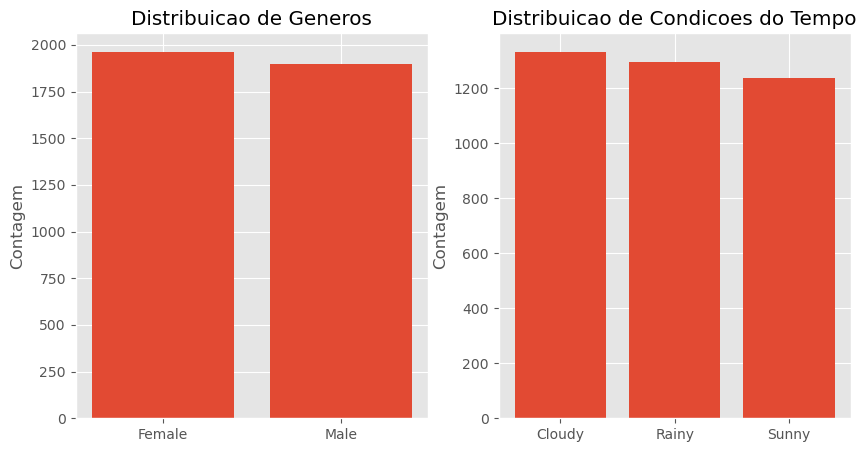

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].bar(df['Gender'].value_counts().index, df['Gender'].value_counts())
axs[0].set_title('Distribuicao de Generos')
axs[0].set_ylabel('Contagem')

axs[1].bar(df['Weather Conditions'].value_counts().index, df['Weather Conditions'].value_counts())
axs[1].set_title('Distribuicao de Condicoes do Tempo')
axs[1].set_ylabel('Contagem')

plt.show()

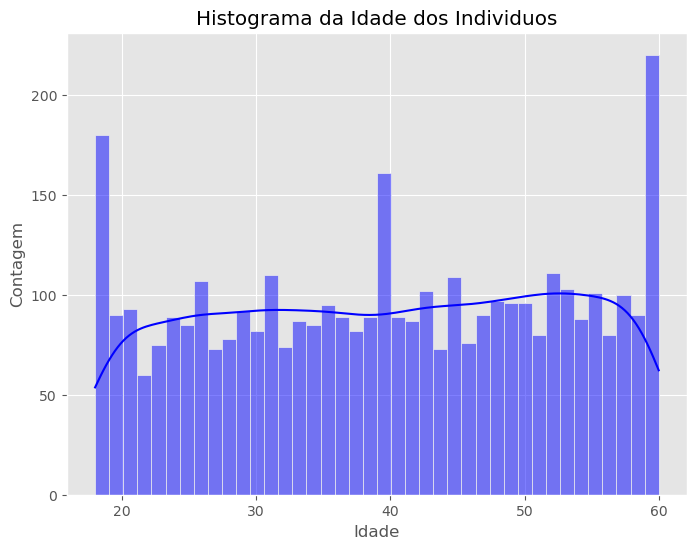

In [12]:
plt.figure(figsize = (8, 6))

_ = sns.histplot(df['Age'], bins = 40, kde = True, color = 'blue')
_ = plt.title('Histograma da Idade dos Individuos')
_ = plt.xlabel('Idade')
_ = plt.ylabel('Contagem')

_ = plt.show()

Podemos notar que nosso dataset esta bem divido entre homens, mulheres e condicoes do tempo nao temos uma grande disparidade nos dados isso sera bastante interessante para analises mais a fundo que logo faremos. No histograma de idade podemos ver alguns picos entre os usuarios de 18-20 , 38-40 e 56-60 anos mas no geral nossa amostra esta bem dividida entre jovens e adultos.

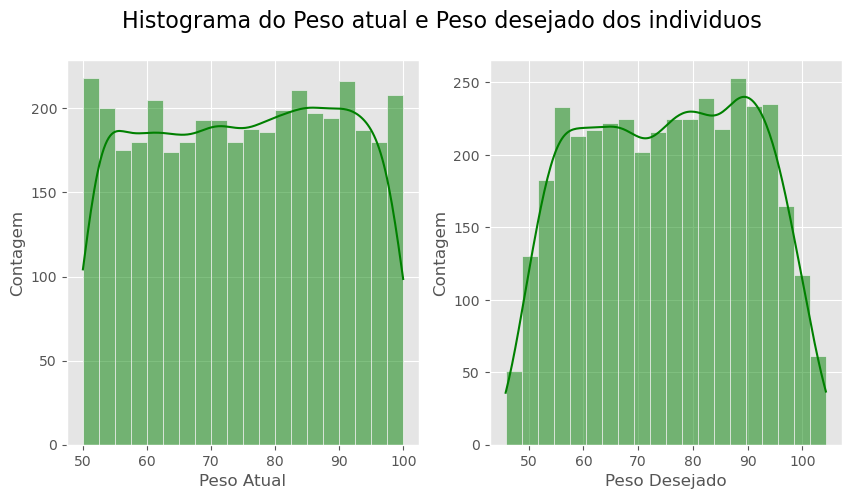

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.histplot(x = 'Dream Weight', data = df, ax = axs[0], bins = 20, kde = True, color = 'green')
axs[0].set_xlabel('Peso Atual')
axs[0].set_ylabel('Contagem')

sns.histplot(x = 'Actual Weight', data = df, ax = axs[1], bins = 20, kde = True, color = 'green')
axs[1].set_xlabel('Peso Desejado')
axs[1].set_ylabel('Contagem')

plt.suptitle('Histograma do Peso atual e Peso desejado dos individuos', fontsize = 16)

plt.show()

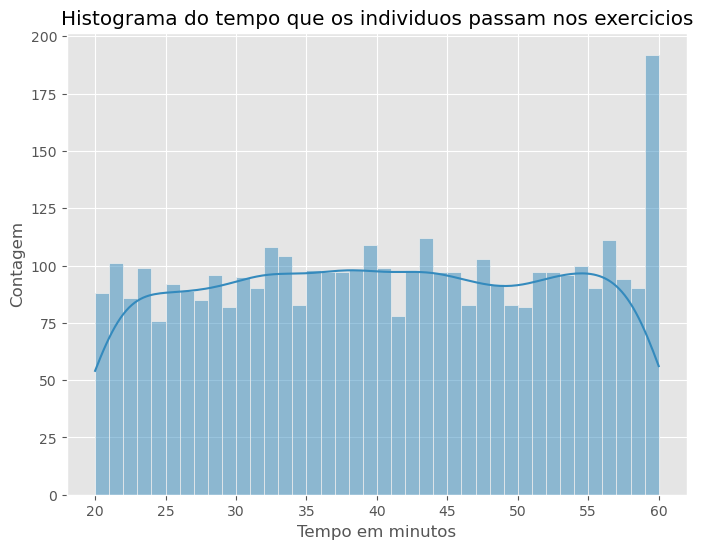

In [14]:
plt.figure(figsize = (8, 6))

sns.histplot(x = df['Duration'], bins = 40, kde = True)
plt.title('Histograma do tempo que os individuos passam nos exercicios')
plt.xlabel('Tempo em minutos')
plt.ylabel('Contagem')

plt.show()

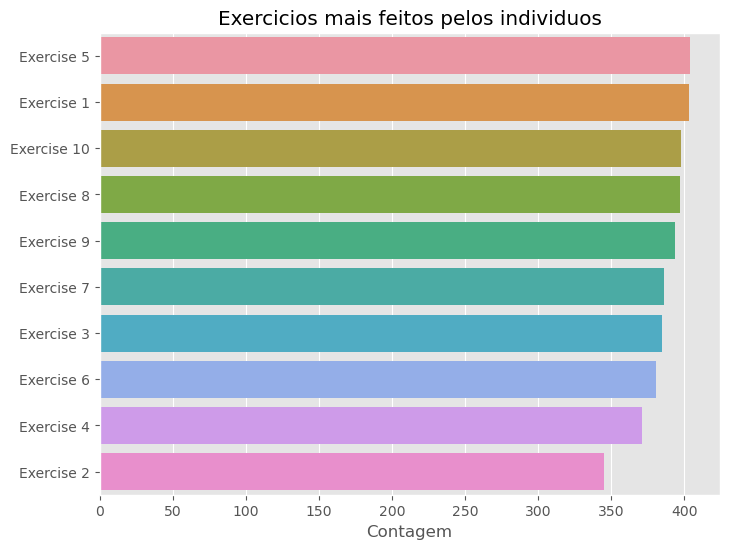

In [15]:
plt.figure(figsize = (8, 6))

sns.barplot(x = df['Exercise'].value_counts(), y = df['Exercise'].value_counts().index, orient = 'h')
plt.title('Exercicios mais feitos pelos individuos')
plt.xlabel('Contagem')

plt.show()

# 4.2 Analise Bivariada

In [16]:
lower_actual_weight = df[['Dream Weight', 'Actual Weight']].sort_values('Actual Weight')[:50]

upper_actual_weight = df[['Dream Weight', 'Actual Weight']].sort_values('Actual Weight', ascending = False)[:50]

In [17]:
lower_actual_weight.describe()

,Dream Weight,Actual Weight
count,50.000000,50.000000
mean,51.264247,47.595789
std,0.740755,0.737197
min,50.024630,45.783747
25%,50.694182,47.220239
50%,51.249257,47.734204
75%,51.630983,48.287950
max,53.066457,48.588043


In [18]:
upper_actual_weight.describe()

,Dream Weight,Actual Weight
count,50.000000,50.000000
mean,98.933712,102.746756
std,0.620734,0.715831
min,97.535017,101.700378
25%,98.655959,102.113687
50%,98.994478,102.668847
75%,99.475366,103.223761
max,99.854746,104.309600


In [19]:
mean_lower = lower_actual_weight.mean().reset_index()

mean_upper = upper_actual_weight.mean().reset_index()

In [20]:
mean_upper.columns = ['D/A', 'mean']
mean_lower.columns = ['D/A', 'mean']

In [21]:
mean_lower['type'] = 'lower'

mean_upper['type'] = 'upper'

In [22]:
conca = pd.concat([mean_lower, mean_upper], axis = 0)

In [23]:
conca

,D/A,mean,type
0,Dream Weight,51.264247,lower
1,Actual Weight,47.595789,lower
0,Dream Weight,98.933712,upper
1,Actual Weight,102.746756,upper


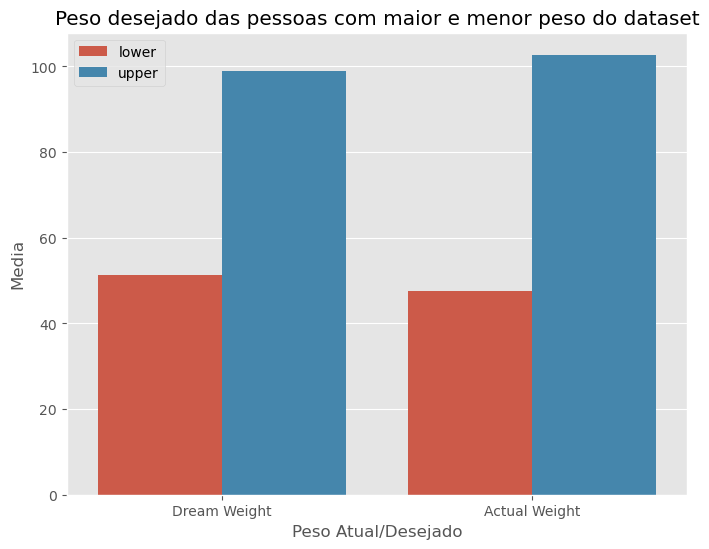

In [24]:
plt.figure(figsize = (8, 6))

sns.barplot(x = 'D/A', y = 'mean', hue = 'type', data = conca)
plt.title('Peso desejado das pessoas com maior e menor peso do dataset')
plt.xlabel('Peso Atual/Desejado')
plt.ylabel('Media')

plt.legend()

plt.show()

As pessoas com menor peso tendem a querer aumentar seu peso ja os com maior peso querem perder, me surpreende nao ter uma variancia tao alta do peso atual com peso desejado isso diz que as pessoas estao felizes com seu peso e buscando uma vida mais saudavel atraves de exercicios

In [25]:
exercise_calories = df.groupby('Exercise')['Calories Burn'].mean().reset_index()

intensity_calories = df.groupby('Exercise Intensity')['Calories Burn'].mean().reset_index()

conditions_calories = df.groupby('Weather Conditions')['Calories Burn'].mean().reset_index()

duration_calories = df[['Duration', 'Calories Burn']]

duration_calories['intervalo'] = pd.cut(duration_calories['Duration'],
                                        bins = [20, 30, 40, 50, 61],
                                        labels = ['20-30', '30-40', '40-50', '50-60'],
                                       right = False)

intervalo_calories = duration_calories.groupby('intervalo')['Calories Burn'].mean().reset_index()

gender_calories = df.groupby('Gender')['Calories Burn'].mean().reset_index()

age_intervalo = df[['Age', 'Calories Burn']]

age_intervalo['intervalo'] = pd.qcut(age_intervalo['Age'],
                                     q = 4,
                                     labels = ['18-29', '29-40', '40-51', '51-60'])

age_calories = age_intervalo.groupby('intervalo')['Calories Burn'].mean().reset_index()

C:\Users\gaels\AppData\Local\Temp\ipykernel_3764\43638026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_calories['intervalo'] = pd.cut(duration_calories['Duration'],
C:\Users\gaels\AppData\Local\Temp\ipykernel_3764\43638026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_intervalo['intervalo'] = pd.qcut(age_intervalo['Age'],


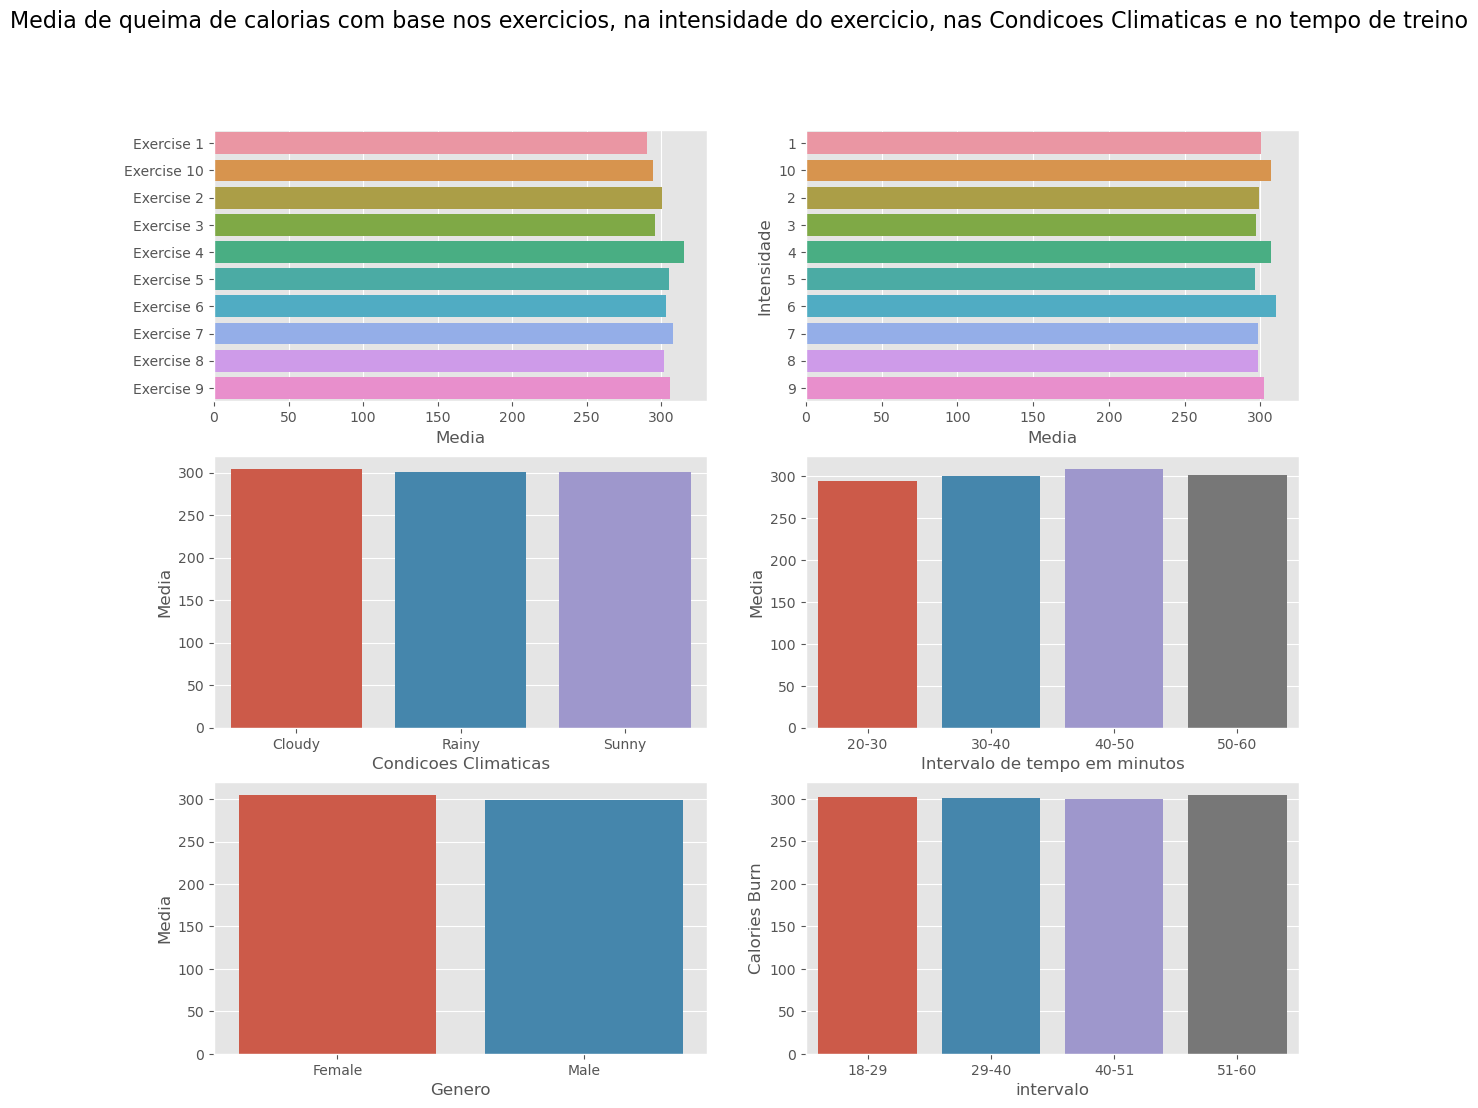

In [26]:
fig, axs = plt.subplots(3, 2, figsize = (14, 12))

sns.barplot(x = 'Calories Burn', y = 'Exercise', data = exercise_calories, orient = 'h', ax = axs[0][0])
axs[0][0].set_xlabel('Media')
axs[0][0].set_ylabel('')

sns.barplot(x = 'Calories Burn', y = 'Exercise Intensity', data = intensity_calories, orient = 'h', ax = axs[0][1])
axs[0][1].set_xlabel('Media')
axs[0][1].set_ylabel('Intensidade')

sns.barplot(x = 'Weather Conditions', y = 'Calories Burn', data = conditions_calories, ax = axs[1][0])
axs[1][0].set_xlabel('Condicoes Climaticas')
axs[1][0].set_ylabel('Media')

sns.barplot(x = intervalo_calories['intervalo'], y = intervalo_calories['Calories Burn'], ax = axs[1][1])
axs[1][1].set_xlabel('Intervalo de tempo em minutos')
axs[1][1].set_ylabel('Media')

sns.barplot(x = 'Gender', y = 'Calories Burn', data = gender_calories, ax = axs[2][0])
axs[2][0].set_xlabel('Genero')
axs[2][0].set_ylabel('Media')

sns.barplot(x = 'intervalo', y = 'Calories Burn', data = age_calories, ax = axs[2][1])
axs[2][0].set_xlabel('Genero')
axs[2][0].set_ylabel('Media')

plt.suptitle('Media de queima de calorias com base nos exercicios, na intensidade do exercicio, nas Condicoes Climaticas e no tempo de treino', fontsize = 16)

plt.show()

Podemos notar que nao existe um unico fator determinante na queima de gordura vamos investigar mais a fundo quais sao as variaveis que mais influenciam na queima de calorias na analise multivariada

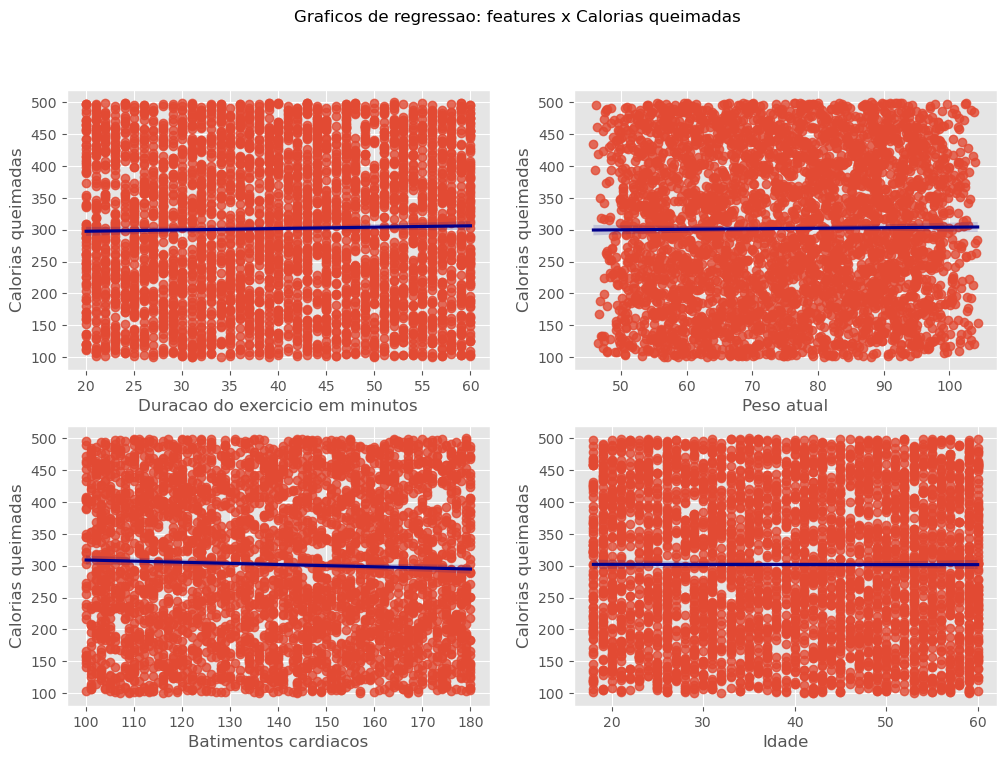

In [27]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))

sns.regplot(x = 'Duration', y = 'Calories Burn', data = df, ax = axs[0][0], line_kws = {'color': 'darkblue'})
axs[0][0].set_xlabel('Duracao do exercicio em minutos')
axs[0][0].set_ylabel('Calorias queimadas')

sns.regplot(x = 'Actual Weight', y = 'Calories Burn', data = df, ax = axs[0][1], line_kws = {'color': 'darkblue'})
axs[0][1].set_xlabel('Peso atual')
axs[0][1].set_ylabel('Calorias queimadas')

sns.regplot(x = 'Heart Rate', y = 'Calories Burn', data = df, ax = axs[1][0], line_kws = {'color': 'darkblue'})
axs[1][0].set_xlabel('Batimentos cardiacos')
axs[1][0].set_ylabel('Calorias queimadas')

sns.regplot(x = 'Age', y = 'Calories Burn', data = df, ax = axs[1][1], line_kws = {'color': 'darkblue'})
axs[1][1].set_xlabel('Idade')
axs[1][1].set_ylabel('Calorias queimadas')

plt.suptitle('Graficos de regressao: features x Calorias queimadas', fontsize = 12)

plt.show()

In [28]:
corr = df.corr()

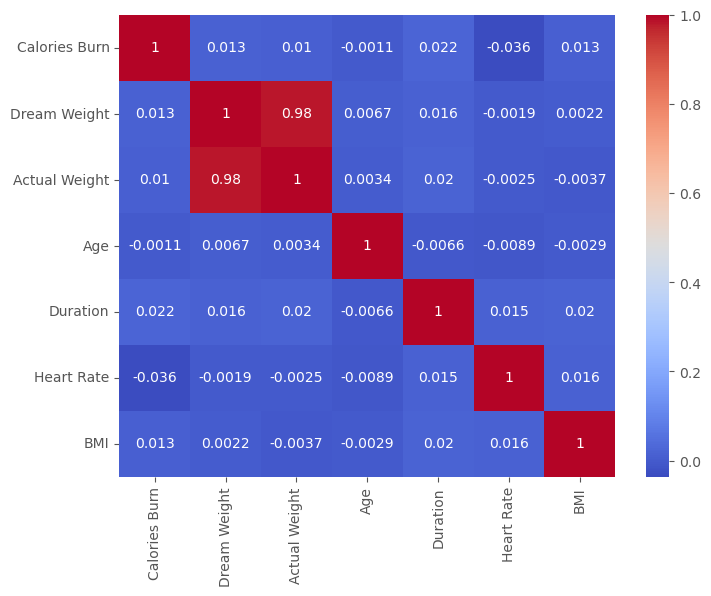

In [29]:
plt.figure(figsize = (8, 6))

sns.heatmap(corr, annot = True, cmap = 'coolwarm')

plt.show()

# 4.3 Analise Multivariada

In [138]:
exercise_intensity_calories = df.groupby(['Exercise', 'Exercise Intensity'])['Calories Burn'].mean().reset_index()

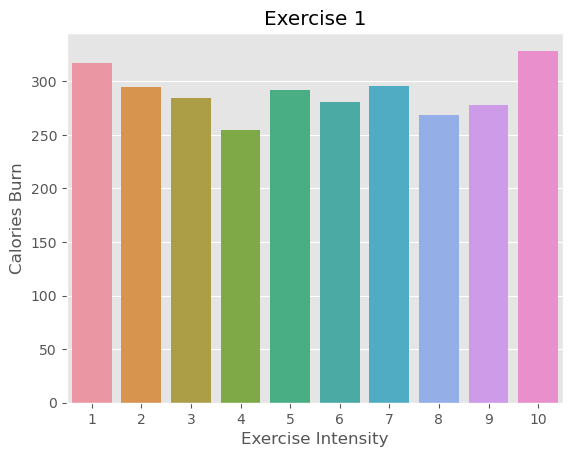

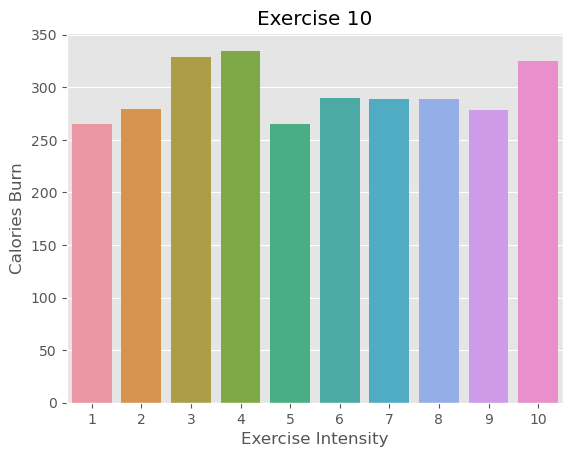

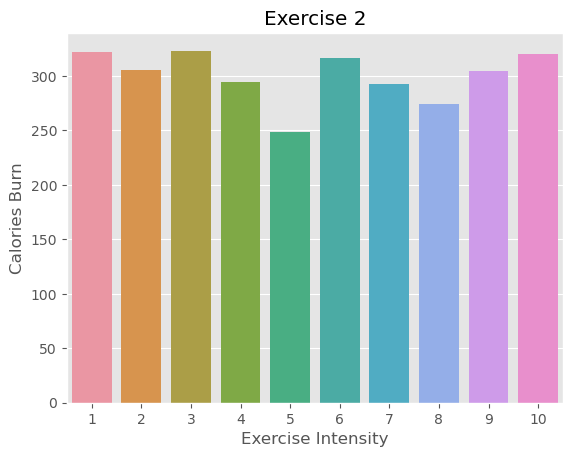

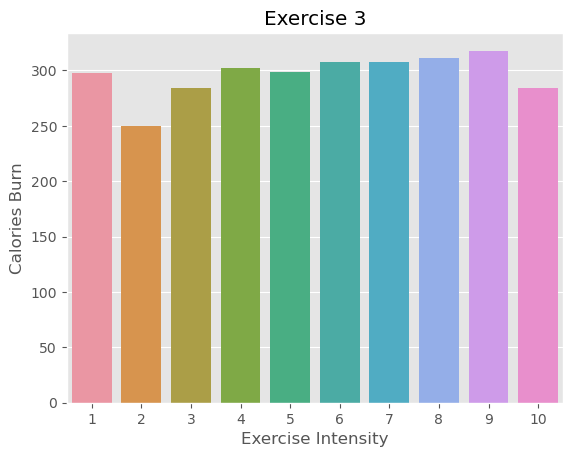

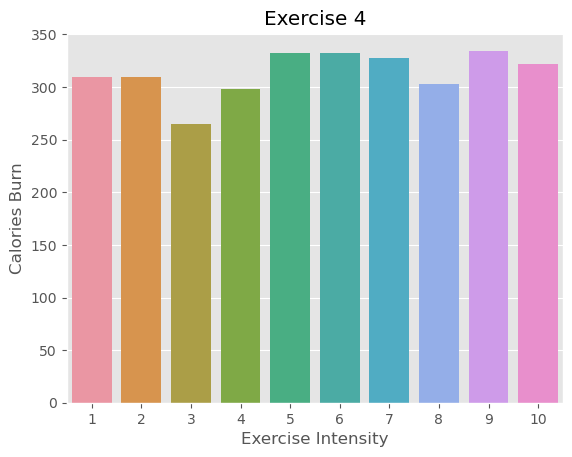

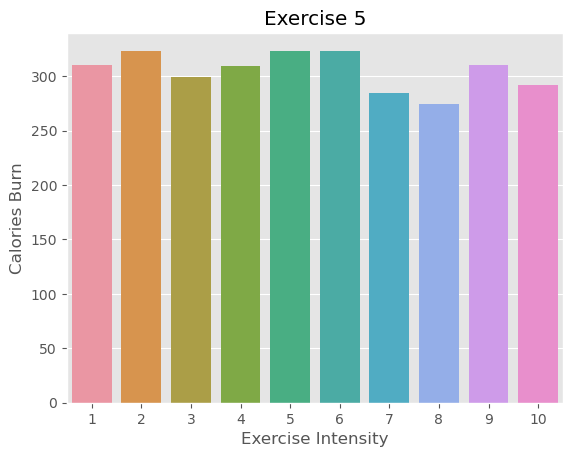

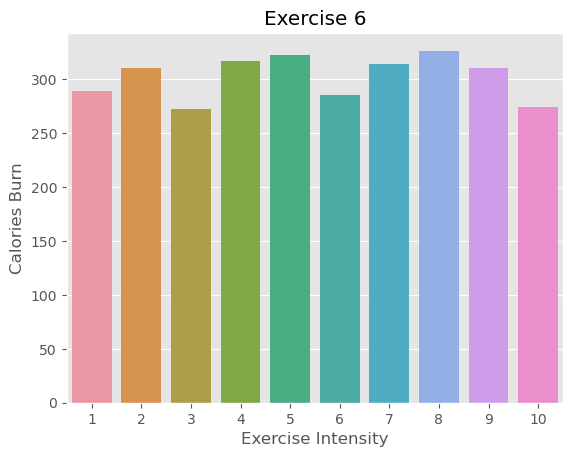

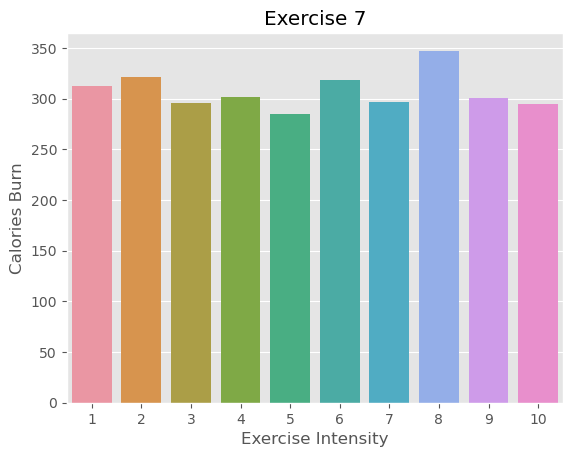

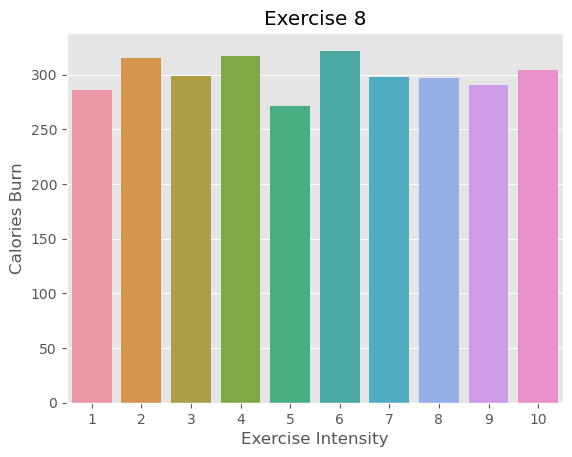

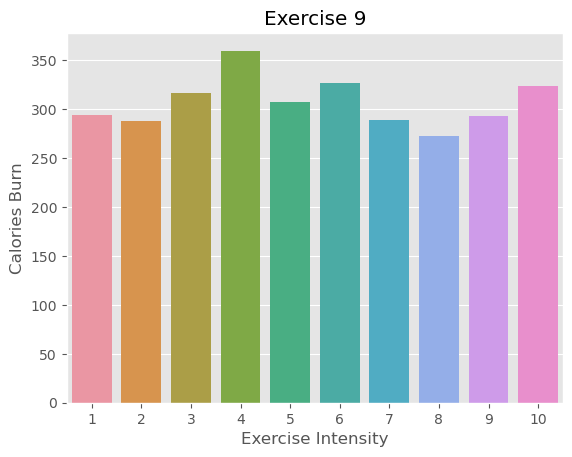

In [84]:
for i in exercise_intensity_calories['Exercise'].unique():
    sns.barplot(x = 'Exercise Intensity',
                y = 'Calories Burn',
                data = exercise_intensity_calories[exercise_intensity_calories['Exercise'] == i])
    plt.title(i)

    plt.show()

In [117]:
min_calories = exercise_intensity_calories.loc[exercise_intensity_calories.groupby('Exercise')['Calories Burn'].idxmin()].rename(columns = {'Calories Burn': 'min_calories',
                                                                                                                                           'Exercise Intensity': 'Intensity_min_calories'})

max_calories = exercise_intensity_calories.loc[exercise_intensity_calories.groupby('Exercise')['Calories Burn'].idxmax()].rename(columns = {'Calories Burn': 'max_calories',
                                                                                                                                           'Exercise Intensity': 'Intensity_max_calories'})

In [118]:
result = pd.merge(min_calories, max_calories, on = 'Exercise')

In [119]:
result

,Exercise,Intensity_min_calories,min_calories,Intensity_max_calories,max_calories
0,Exercise 1,4,254.322446,10,328.620566
1,Exercise 10,5,264.701273,4,334.842681
2,Exercise 2,5,248.562854,3,323.211371
3,Exercise 3,2,250.164019,9,317.839235
4,Exercise 4,3,264.556409,9,334.562129
5,Exercise 5,8,274.363344,2,323.462379
6,Exercise 6,3,272.325668,8,326.584435
7,Exercise 7,5,285.077647,8,347.315843
8,Exercise 8,5,271.879059,6,322.009956
9,Exercise 9,8,272.232537,4,359.727524


Podemos ver que na maioria dos casos quanto maior a intensidade no exercicio maior e o gasto de calorias mas temos alguns casos que quanto menor a intensidade maior foi o gasto calorico, vamos adicionar aa variaveis 'Duration', 'Gender' e 'Weather Conditions' nesta analise para vermos se conseguimos algum insight

In [159]:
exercise_intensity_duration_calories = df.groupby(['Exercise', 'Exercise Intensity', 'Gender', 'Weather Conditions'])[['Duration', 'Calories Burn']].mean().reset_index()

In [160]:
min_calories = exercise_intensity_duration_calories.loc[exercise_intensity_duration_calories.groupby('Exercise')['Calories Burn'].idxmin()].rename(columns = {'Calories Burn': 'min_calories',
                                                                                                                                           'Exercise Intensity': 'Intensity_min_calories',
                                                                                                                                           'Duration': 'Duration_min_calories',
                                                                                                                                           'Gender': 'Gender_min_calories',
                                                                                                                                           'Weather Conditions': 'Weather_Conditions_min'})

max_calories = exercise_intensity_duration_calories.loc[exercise_intensity_duration_calories.groupby('Exercise')['Calories Burn'].idxmax()].rename(columns = {'Calories Burn': 'max_calories',
                                                                                                                                           'Exercise Intensity': 'Intensity_max_calories',
                                                                                                                                           'Duration': 'Duration_max_calories',
                                                                                                                                           'Gender': 'Gender_max_calories',
                                                                                                                                           'Weather Conditions': 'Weather_Conditions_max'})

In [161]:
result = pd.merge(min_calories, max_calories, on = 'Exercise')

In [162]:
result

,Exercise,Intensity_min_calories,Gender_min_calories,Weather_Conditions_min,Duration_min_calories,min_calories,Intensity_max_calories,Gender_max_calories,Weather_Conditions_max,Duration_max_calories,max_calories
0,Exercise 1,9,Male,Sunny,33.000000,117.700846,10,Female,Cloudy,37.500000,456.367291
1,Exercise 10,6,Female,Rainy,48.142857,181.381319,4,Male,Rainy,35.428571,416.224844
2,Exercise 2,9,Male,Rainy,39.000000,186.971006,5,Male,Sunny,52.000000,450.581045
3,Exercise 3,1,Male,Sunny,57.000000,127.650937,6,Male,Rainy,28.600000,418.536322
4,Exercise 4,3,Male,Rainy,56.000000,141.585851,9,Male,Sunny,49.800000,433.676306
5,Exercise 5,8,Male,Rainy,40.750000,146.289112,8,Female,Sunny,52.000000,418.861235
6,Exercise 6,3,Male,Rainy,43.800000,181.984136,8,Male,Cloudy,42.600000,398.322273
7,Exercise 7,9,Female,Sunny,39.666667,179.098305,7,Female,Cloudy,42.000000,420.165128
8,Exercise 8,5,Male,Cloudy,33.500000,174.840301,5,Female,Cloudy,23.000000,480.157117
9,Exercise 9,2,Female,Rainy,38.875000,169.293384,8,Female,Sunny,44.000000,422.403324


Agora podemos perceber que mulheres mesmo fazendo exercicios com uma menor intensidade que os homens tendem a ter uma queima de calorias maior e que os individuos tem um gasto calorico maior em dias nublados ou ensolarados

# 5. Aplicando modelo de Machine Learning

# 5.1 Selecao de Features

In [199]:
df['intervalo'] = pd.qcut(age_intervalo['Calories Burn'],
                                     q = 4,
                                     labels = ['100-202', '202-299', '299-404', '404-499'])

In [190]:
df['Exercise'] = df['Exercise'].map({'Exercise 1': 1, 'Exercise 2': 2,
                                    'Exercise 3': 3, 'Exercise 4': 4,
                                    'Exercise 5': 5, 'Exercise 6': 6,
                                    'Exercise 7': 7, 'Exercise 8': 8,
                                    'Exercise 9': 9, 'Exercise 10': 10,})

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df['Weather Conditions'] = df['Weather Conditions'].map({'Rainy': 2, 'Cloudy': 1, 'Sunny': 0})

In [249]:
X = np.array(df[['Exercise', 'Gender', 'Weather Conditions', 'Exercise Intensity']])

y = np.array(df['intervalo'])

# 5.2 Trainando modelo

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [252]:
modelRF = RandomForestClassifier(n_estimators = 500)

In [253]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [254]:
y_pred = modelRF.predict(X_test)

# 5.3 Avaliando Modelo

In [255]:
modelRF.score(X_test, y_test)

0.2663793103448276

In [256]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [257]:
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precisão: 0.2661740408254424
Recall: 0.2663793103448276
F1-Score: 0.26583391266287926


In [258]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [259]:
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[82 73 68 62]
 [68 69 76 76]
 [58 71 84 63]
 [82 75 79 74]]


# 6. Conclusao

Nosso modelo teve uma precisoa muito baixa talvez para que possamos fazer um modelo melhor seja necessario mais variaveis como se o individuo faz dieta, percentual de gordura(BF), nivel de sedentarismo, biotipo entre outros. Bom... Nao conseguimos sucesso no nosso modelo de ML mas conseguimos ter varios insights com diversos graficos sobre esse dataset